In [3]:
!pip3 install torch

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import os
import glob
import numpy as np
import pandas as pd

hi


In [2]:
col_names = ["Chr", "Start", "End", "ATAC Seq"]

In [3]:
root_path = "/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/"

In [4]:
inputs = ["ATAC-seq/", "/HiC_AB/", "/Histones_ChIP-seq/", "/RNAPolymerase_ChIP-seq/"]

path_to_signal = "/signal/processed/"

atac_seq_files = ["ENCFF019IPA.bigWig.bedgraph.5k.bin",
                  "ENCFF496GRF.bigWig.bedgraph.5k.bin",
                  "ENCFF093IIW.bigWig.bedgraph.5k.bin",
                  "ENCFF656ZKM.bigWig.bedgraph.5k.bin",
                  "ENCFF102ARJ.bigWig.bedgraph.5k.bin", 
                  "ENCFF754EAC.bigWig.bedgraph.5k.bin",
                  "ENCFF451IKJ.bigWig.bedgraph.5k.bin"]

hic_files = ["ENCFF369SUV.bed.ed.bin.binary",
       "ENCFF456BBV.bed.ed.bin.binary",
       "ENCFF726JJU.bed.ed.bin.binary",
       "ENCFF749YOA.bed.ed.bin.binary"]

rna_files = ["ENCFF042PRZ.bigWig.bedgraph.5k.bin",
             "ENCFF555CHY.bigWig.bedgraph.5k.bin",
             "ENCFF052NEG.bigWig.bedgraph.5k.bin",
             "ENCFF647MSS.bigWig.bedgraph.5k.bin",
             "ENCFF345HKX.bigWig.bedgraph.5k.bin",
             "ENCFF886MYL.bigWig.bedgraph.5k.bin",
             "ENCFF348UKA.bigWig.bedgraph.5k.bin",
             "ENCFF910GGT.bigWig.bedgraph.5k.bin",
             "ENCFF552VTT.bigWig.bedgraph.5k.bin"]

In [5]:
col_dtype={"Chr":str, "Start":int, "End":int, "ATAC Seq":object}
col_names = ["Chr", "Start", "End", "ATAC Seq"]

for p in atac_seq_files:
    print(root_path + inputs[0] + path_to_signal + p)

atac_data = [pd.read_csv(root_path + inputs[0] + path_to_signal + p, sep='\t',  names = col_names, dtype = col_dtype) for p in atac_seq_files]


/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/ATAC-seq//signal/processed/ENCFF019IPA.bigWig.bedgraph.5k.bin
/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/ATAC-seq//signal/processed/ENCFF496GRF.bigWig.bedgraph.5k.bin
/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/ATAC-seq//signal/processed/ENCFF093IIW.bigWig.bedgraph.5k.bin
/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/ATAC-seq//signal/processed/ENCFF656ZKM.bigWig.bedgraph.5k.bin
/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/ATAC-seq//signal/processed/ENCFF102ARJ.bigWig.bedgraph.5k.bin
/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/ATAC-seq//signal/processed/ENCFF754EAC.bigWig.bedgraph.5k.bin
/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/ATAC-seq//signal/processed/ENCFF451IKJ.bigWig.bedgraph.5k.bin


In [6]:
atac_data_first = atac_data[0]
#atac_data_first = atac_data_first[atac_data_first["ATAC Seq"] != "."]

,Chr,Start,End,ATAC Seq
0,chr1,0,5000,0
1,chr1,5000,10000,0.883549375
2,chr1,10000,15000,1.449749032
3,chr1,15000,20000,0.03929666667
4,chr1,20000,25000,0.058945
...,...,...,...,...
575631,chr9,138290000,138295000,0.094276
575632,chr9,138295000,138300000,0.07857333333
575633,chr9,138300000,138305000,0
575634,chr9,138305000,138310000,0


In [7]:

col_dtype={"Chr":str, "Start":int, "End":int, "RNA Seq":object}
col_names = ["Chr", "Start", "End", "RNA Seq"]

rna_data = [pd.read_csv(root_path + inputs[3] + path_to_signal + p, sep='\t', names = col_names ,dtype = col_dtype) for p in rna_files]

In [8]:
rna_data_first = rna_data[0]

In [9]:
col_dtype={"Chr":str, "Start":int, "End":int, "HiC":bool}
col_names = ["Chr", "Start", "End", "HiC"]

HiC_paths = glob.glob(os.path.join(root_path, "HiC_AB" + "/",'*binary'))
print("Scanning paths", HiC_paths)
HiC_data = [pd.read_csv(p, sep='\t', names = col_names ,dtype = col_dtype) for p in HiC_paths]

Scanning paths ['/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/HiC_AB/ENCFF726JJU.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/HiC_AB/ENCFF456BBV.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/HiC_AB/ENCFF369SUV.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/HiC_AB/ENCFF749YOA.bed.ed.bin.binary']


In [10]:
HiC_data_first = HiC_data[0]

In [11]:
histone_path = "/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/signal/"
histones = os.listdir(histone_path)

histone_data = []
for i in histones:
    if i == 'README' or i=="tmp":
        continue
    
    col_dtype={"Chr":str, "Start":int, "End":int, i:object}
    col_names = ["Chr", "Start", "End", i]

    histone_paths = glob.glob(os.path.join(histone_path,i + "/processed/",'*bin'))
    print("Scanning paths", histone_paths)
    for i,p in enumerate(histone_paths):
        if i != 0:
            continue
        histone_data.append(pd.read_csv(p, sep='\t', names = col_names ,dtype = col_dtype))

Scanning paths ['/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/signal/H3K9Ac/processed/ENCFF236VCK.bigWig.bedgraph.5k.bin', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/signal/H3K9Ac/processed/ENCFF546QNT.bigWig.bedgraph.5k.bin', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/signal/H3K9Ac/processed/ENCFF848OVA.bigWig.bedgraph.5k.bin', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/signal/H3K9Ac/processed/ENCFF650QTM.bigWig.bedgraph.5k.bin', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/signal/H3K9Ac/processed/ENCFF937QUK.bigWig.bedgraph.5k.bin', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/signal/H3K9Ac/processed/ENCFF286WRJ.bigWig.bedgraph.5k.bin']
Scanning paths ['/gpfs/commons/home/cangel/g2lab/cours

In [12]:
histone_data = pd.concat(histone_data, axis = 1)

In [13]:
full_data = pd.concat([histone_data, atac_data_first, HiC_data_first, rna_data_first], axis=1)

In [14]:
full_data_trimmed = full_data.loc[:,~full_data.columns.duplicated()].copy()

In [15]:
for x in ["H3K9Ac", "H3K4me3","H3K4me2","H3K27me3","H3K4me1","H3K27Ac","ATAC Seq","HiC","RNA Seq"]:
    full_data_trimmed = full_data_trimmed[full_data_trimmed[x].notna()]
    full_data_trimmed = full_data_trimmed[full_data_trimmed[x] != "."]

In [48]:
full_data_trimmed.to_csv("./full_signal_trimmed.csv")

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler


normalized_data = full_data_trimmed.copy()
normalized_data["Start"] = normalized_data["Start"].div(5000)
normalized_data["End"] = normalized_data["End"].div(5000)

normalized_data['Chr'] = normalized_data['Chr'].astype(str) 
normalized_data['Start'] = normalized_data['Start'].astype(int)
normalized_data['End'] = normalized_data['End'].astype(int)

for col in ["H3K9Ac", "H3K4me3","H3K4me2","H3K27me3","H3K4me1","H3K27Ac","ATAC Seq","RNA Seq"]:
    normalized_data[col] = normalized_data[col].astype(float)

normalized_data.columns = ['Chr', 'Start (5000 bp steps)', 'End (5000 bp steps)', 'H3K9Ac', 'H3K4me3', 'H3K4me2', 'H3K27me3',
       'H3K4me1', 'H3K27Ac', 'ATAC Seq', 'HiC', 'RNA Seq']

for col in ["H3K9Ac", "H3K4me3","H3K4me2","H3K27me3","H3K4me1","H3K27Ac","ATAC Seq","RNA Seq"]:
    scaler = Normalizer()
    normalized_data[col] = scaler.fit_transform(X=normalized_data[[col]])





array([0., 1.])

In [64]:
normalized_data

,Chr,Start (5000 bp steps),End (5000 bp steps),H3K9Ac,H3K4me3,H3K4me2,H3K27me3,H3K4me1,H3K27Ac,ATAC Seq,HiC,RNA Seq
0,chr1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
1,chr1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,False,1.0
2,chr1,2,3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,1.0
3,chr1,3,4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,1.0
4,chr1,4,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
575613,chr9,27640,27641,1.0,1.0,1.0,1.0,1.0,0.0,1.0,True,1.0
575614,chr9,27641,27642,1.0,1.0,1.0,1.0,0.0,0.0,1.0,True,1.0
575615,chr9,27642,27643,1.0,1.0,1.0,1.0,1.0,0.0,1.0,True,1.0
575616,chr9,27643,27644,1.0,1.0,1.0,1.0,1.0,0.0,1.0,True,1.0


In [69]:
normalized_data.to_csv("./normalized_signal_data.csv")

In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    normalized_data[['H3K9Ac', 'H3K4me3', 'H3K4me2', 'H3K27me3', 'H3K4me1', 'H3K27Ac', 'ATAC Seq', 'HiC']],
    normalized_data['RNA Seq'], test_size=0.2)

# Train a MLP regressor with two hidden layers of 10 neurons each
#mlp = MLPRegressor(hidden_layer_sizes=(400, 200, 100, 50,25,10))
mlp = MLPRegressor(hidden_layer_sizes=(10,10))

mlp.fit(X_train, y_train)

# Predict the target values on the test set and calculate the mean squared error
y_pred = mlp.predict(X_test)


In [49]:
mse = mean_squared_error(y_test, y_pred)

print(f"Mean squared error: {mse:}")

Mean squared error: 1.0797394154093476


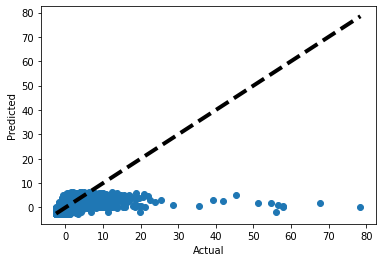

In [50]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

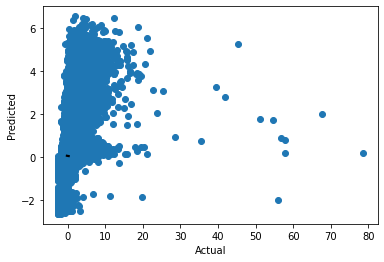

In [51]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred)
plt.plot([0, 0.1], [0, 0.1], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

-3.2950409083313152
-30.896518261580486
-6.234509175184095
-2.8119540799071943
-18.55721892115593
-49.64258032929112
-74.08167030373849
-97.64915813712821
-111.80912960641925
-122.45688095731064
-194.23048030087364
-270.61578126340413
-434.36921589652235
-531.1213823078099
-556.6100783369697
-1097.0887356652913
-1128.1982458333437
-1196.8434562112996
-1124.975514022541
-2303.4728550840946
-1171.7380001105207
-12487.074406791908
-4611.973763445312
-18332.248666814176
-27171.338927133067
-5201.34599448489
-95354.26792669215
-6880.580155799147
-7972.042652016419


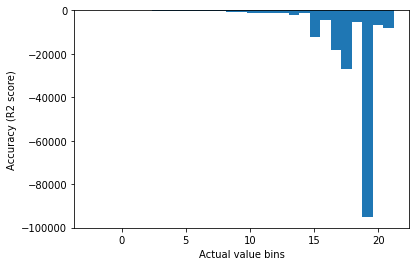

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


bins = np.linspace(np.min(y_test), np.max(y_test), 100)  # 10 equally-spaced bins
accuracy = []
for i in range(len(bins)-1):
    idx = np.where((y_test >= bins[i]) & (y_test < bins[i+1]))
    if len(idx[0]) == 0 or len(idx[0]) == 1:
        break
    bin_acc = r2_score(y_test.to_numpy()[idx], y_pred[idx])
    print(bin_acc)
    accuracy.append(bin_acc)

# Plot accuracy vs actual value bins
plt.bar(bins[:-1][:len(accuracy)], accuracy, width=(bins[1]-bins[0]), align='edge')
plt.xlabel('Actual value bins')
plt.ylabel('Accuracy (R2 score)')
plt.show()

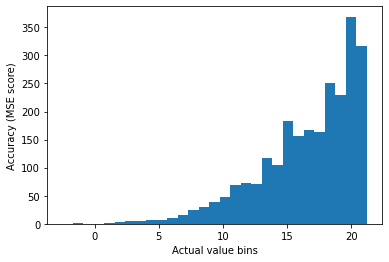

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


bins = np.linspace(np.min(y_test), np.max(y_test), 100)  # 10 equally-spaced bins
accuracy = []
for i in range(len(bins)-1):
    idx = np.where((y_test >= bins[i]) & (y_test < bins[i+1]))
    if len(idx[0]) == 0 or len(idx[0]) == 1:
        break
    bin_acc = mean_squared_error(y_test.to_numpy()[idx], y_pred[idx])
    accuracy.append(bin_acc)

# Plot accuracy vs actual value bins
plt.bar(bins[:-1][:len(accuracy)], accuracy, width=(bins[1]-bins[0]), align='edge')
plt.xlabel('Actual value bins')
plt.ylabel('Accuracy (MSE score)')
plt.show()

In [110]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

class_weights = {0: 1, 1: len(y_train[y_train==0])/len(y_train[y_train==1])}

# Train a MLP classifier with two hidden layers of 10 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), class_weight=class_weights)
mlp.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'class_weight'

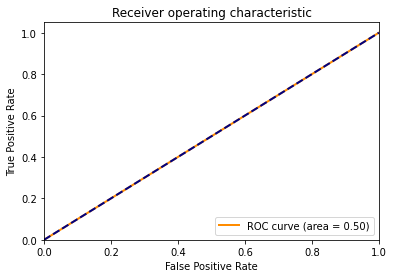

In [109]:
# Predict the probabilities of the positive class on the test set
y_pred_prob = mlp.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [60]:
obs = [pd.read_table(glob.glob(os.path.join(root_path,i + "/peaks/",'*binary'))[0],header = None, 
                     names= ['chr','start','end',i]) for i in assays if i!= 'README' or i!='resources' or i != 'Histones_ChIP-seq']

IndexError: list index out of range

In [57]:
obs = [pd.read_table(glob.glob(os.path.join(root_path,i + "/peaks/",'*binary'))[0],header = None, 
                     names= ['chr','start','end',i]) for i in assays if i!= 'README' or i!='resources']

NameError: name 'obs' is not defined

['RNAPolymerase_ChIP-seq', 'Histones_ChIP-seq', 'HiC_AB', 'resources', 'ATAC-seq']


In [111]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split

In [112]:
# Define the MLP class
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [141]:
# Compute the weights for the two classes based on their frequencies in the training set

class_weights = torch.tensor([1, 10 * len(y_train[y_train==0])/len(y_train[y_train==1])], dtype=torch.float)
print(class_weights)

tensor([1.0000e+00, 2.5218e+03])


In [128]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

y_train = y_train.astype('bool')
y_test = y_test.astype('bool')

In [133]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [134]:
# Define the DataLoader objects to batch and shuffle the data during training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [142]:
# Instantiate the MLP model, criterion and optimizer
model = MLP(input_size=10, hidden_size=10, output_size=2)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters())

STOP = 31250
# Train the model
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print('Epoch %d, loss: %.3f' % (epoch+1, running_loss/len(train_loader)))

Epoch 1, loss: 13.300


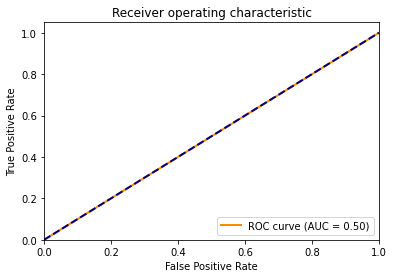

In [143]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a function to plot the ROC curve
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the model on the test set and generate predictions
y_true = y_test_tensor.numpy()
y_scores = model(X_test_tensor).detach().numpy()[:, 1]

# Plot the ROC curve
plot_roc_curve(y_true, y_scores)

In [140]:











    
# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy on test set: %f' % (100 * correct / total))

Accuracy on test set: 99.596951


In [33]:

X_train_r, X_test_r, y_train_r, y_tes_rt = train_test_split(
    normalized_data[['Start', 'End', 'H3K9Ac', 'H3K4me3', 'H3K4me2', 'H3K27me3', 'H3K4me1', 'H3K27Ac', 'ATAC Seq', 'HiC']],
    normalized_data['RNA Seq'], test_size=0.2)

train_df = pd.concat([X_train_r, y_train_r], axis=1)
true_rows = train_df[train_df['RNA Seq'] == True]
false_rows = train_df[train_df['RNA Seq'] == False]

# Shuffle the data to avoid any possible bias
true_rows = true_rows.sample(frac=1).reset_index(drop=True)
false_rows = false_rows.sample(frac=1).reset_index(drop=True)

# Determine the number of rows to include for each output
num_true_rows = min(len(false_rows), len(true_rows))
num_false_rows = min(len(false_rows), len(true_rows))

# Slice the first 'num_true_rows' true rows and the first 'num_false_rows' false rows
reduced_df = pd.concat([true_rows[:num_true_rows], false_rows[:num_false_rows]])

# Shuffle the reduced dataset again
reduced_df = reduced_df.sample(frac=1).reset_index(drop=True)

# Split the reduced dataset back into X_train and y_train
X_train_r = reduced_df.drop('RNA Seq', axis=1)
y_train_r = reduced_df['RNA Seq']

In [41]:
# Train a MLP regressor with two hidden layers of 10 neurons each
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


# Train a MLP classifier with two hidden layers of 10 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(10, 10))
mlp.fit(X_train_r, y_train_r)

# Predict the target values on the test set and calculate the mean squared error
y_pred = mlp.predict(X_test_r)

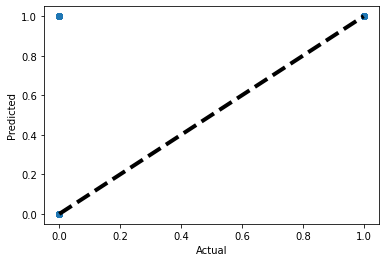

In [42]:
import matplotlib.pyplot as plt


plt.scatter(y_tes_rt, y_pred)
plt.plot([y_tes_rt.min(), y_tes_rt.max()], [y_tes_rt.min(), y_tes_rt.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

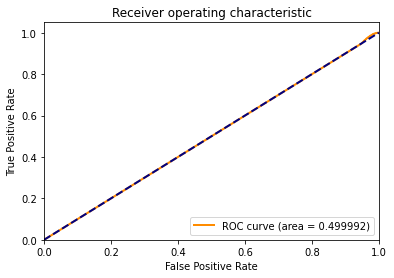

In [44]:
# Predict the probabilities of the positive class on the test set
y_pred_prob = mlp.predict_proba(X_test_r)[:, 1]

# Compute the false positive rate, true positive rate and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_tes_rt, y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()